<a href="https://colab.research.google.com/github/armhijacker/customer_behaviour/blob/MetaksMKT/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#transforming to dataframe
df = pd.read_csv('/content/winequality_9db1d73c3810919f0d5dbf8da7b42be5.csv')
df.head()

,Unnamed: 0,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_y
0,0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,NaN
4,4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [34]:
#summary, describe
df.dtypes

,0
Unnamed: 0,int64
index,int64
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64


In [35]:
df.describe()

,Unnamed: 0,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_y
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1500.000000
mean,799.000000,799.000000,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.635333
std,461.735855,461.735855,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.800903
min,0.000000,0.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,399.500000,399.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,799.000000,799.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,1198.500000,1198.500000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,1598.000000,1598.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [36]:
df.isnull().sum()

,0
Unnamed: 0,0
index,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0


*As the quality is the dependent variable, interpolation or just putting the mean will not work efficiently. I am thinking maybe in this case it would be more efficient to conduct a simple regression, where quality y is the dependent variable and the rest is the independent one.*

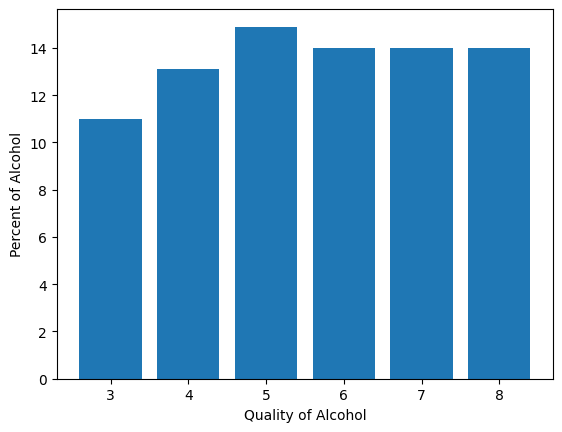

In [37]:
#visualisation (barplot, histogram)
#visualisation (barplot, histogram)
plt.bar(df['quality_y'], df['alcohol'])
plt.xlabel("Quality of Alcohol")  # Rename x-axis
plt.ylabel("Percent of Alcohol")  # Rename y-axis
plt.show()

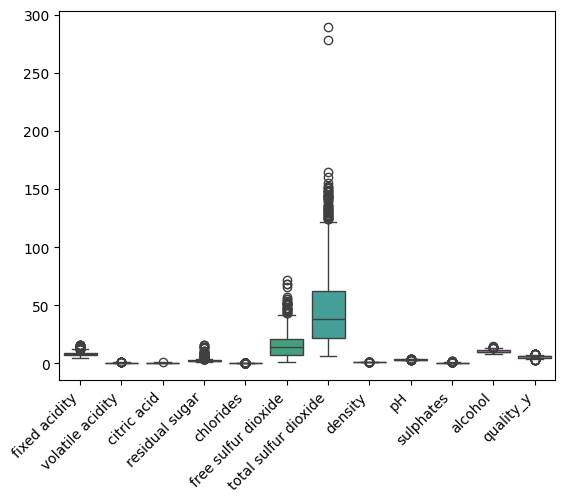

In [38]:
#histplot()
columns_for_boxplot = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                      'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                      'pH', 'sulphates', 'alcohol', 'quality_y']

sns.boxplot(data=df[columns_for_boxplot])
plt.xticks(rotation=45, ha='right')
plt.show()

In [39]:
#Outlier detection
def outliers(df):
  IQR = df.quantile(0.75) - df.quantile(0.25)
  lower_bound = df.quantile(0.25) - (IQR * 1.5)
  upper_bound = df.quantile(0.75) + (IQR * 1.5)
  filtered_df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
  return filtered_df

In [28]:
#outputs dataframe containing only values within the bound
filtered_df = outliers(df)
filtered_df

,Unnamed: 0,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_y
0,0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,NaN
4,4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1594,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,1595,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,1596,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,1597,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,NaN


<Axes: >

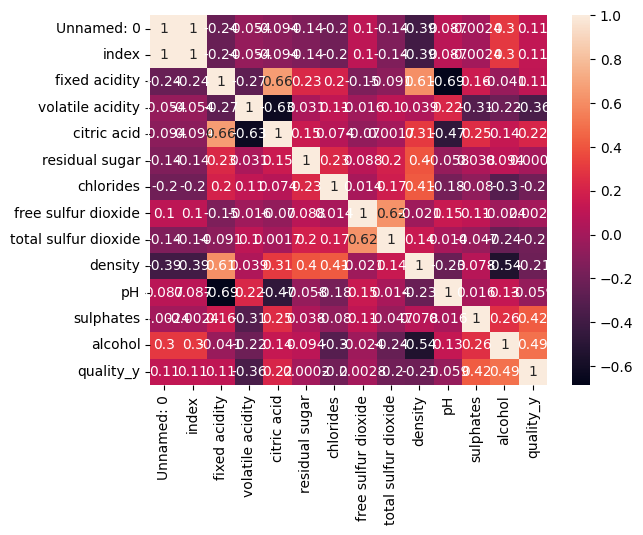

In [56]:
filtered_df.corr()
sns.heatmap(filtered_df.corr(), annot=True)

In [51]:
filtered_df_na = filtered_df.dropna()
filtered_df_na

,Unnamed: 0,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_y
0,0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
4,4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
5,5,5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,1593,1593,6.8,0.62,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0
1594,1594,1594,6.2,0.60,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,1595,1595,5.9,0.55,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,1596,1596,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0


In [50]:
#running linear regression on filtered dataframe
import statsmodels.api as sm

In [55]:
y = filtered_df_na['quality_y']
X = filtered_df_na[['volatile acidity', 'citric acid',
        'free sulfur dioxide', 'total sulfur dioxide',
        'pH', 'sulphates', 'alcohol']] #removed columns: density, residual sugar, fixed acidity, chlorides

# Add a constant term
X = sm.add_constant(X)

# Create and fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              quality_y   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     97.41
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          1.61e-110
Time:                        19:08:38   Log-Likelihood:                -927.64
No. Observations:                1102   AIC:                             1871.
Df Residuals:                    1094   BIC:                             1911.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.2811 

*THe current model includes filtered columns without NAs. This regression indicates that the odel is significant (due to the high F-statistic) but Adj. R-squared still remains low (39%).*

In [58]:
missing_y_indices = df['quality_y'].isnull()

X_missing = df.loc[missing_y_indices, ['volatile acidity', 'citric acid',
                                        'free sulfur dioxide', 'total sulfur dioxide',
                                        'pH', 'sulphates', 'alcohol']]
X_missing = sm.add_constant(X_missing)

predicted_y = results.predict(X_missing)

df.loc[missing_y_indices, 'quality_y'] = predicted_y

*Now, after creating the model we use the predicted y, to fill the missing values.*

In [59]:
df.isnull().sum()

,0
Unnamed: 0,0
index,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
